In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Cálculo masas vs tiempo - GADGET

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo


h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]

vector = ('00','01','03')
vector2 = ('M31','MW')

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,2):
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Masses'].value

        pgas = snap['subhalo_0'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s' %vector[i])+ '/Gas/Masses'].value

        pdrk = snap['subhalo_0'+ str('%s' %vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s' %vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h

        r200 = r200*aexp[isnap]/h

        rgal=0.15*r200

        limit_str   = np.where(rstr < rgal)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])

        limit_gas   = np.where(rgas < rgal)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        limit_drk   = np.where(rdrk < r200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])

        Mc_str = cumsum((mstr[limit_str])[rstr_indice])
        M_gal  = Mc_str[-1]

        Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])
        M_gas  = Mc_gas[-1]

        Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])
        M_drk  = Mc_drk[-1]

    #------------------masa total en r200 (Mvir)--------------------------
        rvir = concatenate([rstr, rgas, rdrk])
        mvir = concatenate([mstr, mgas, mdrk])

        limit_vir   = np.where(rvir < r200)
        rvir_sort   = np.sort(rvir[limit_vir])
        rvir_indice = np.argsort(rvir[limit_vir])

        Mc_vir = cumsum((mvir[limit_vir])[rvir_indice])

        M_vir = Mc_vir[-1]

#-------------------------------------------------------------------  
        archivo =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_masas_time.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% log10(M_gal*1e10)) +'\t'+
                 str('%12.6f'% log10(M_gas*1e10)) +'\t'+
                 str('%12.6f'% log10(M_drk*1e10)) +'\t'+
                 str('%12.6f'% log10(M_vir*1e10)) +'\n')
        archivo.close()

## Cálculo masas vs tiempo - GASOLINE

In [5]:
import h5py
import rotation as rot

a0=1

vector = (1,2,4)
vector2 =('M31','MW')
snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

#     print snapshot[j]

    for i in range(0,2):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value

        pstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value

        pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

        pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = pstr[:,0]-cm[0]
        ystr = pstr[:,1]-cm[1]
        zstr = pstr[:,2]-cm[2]
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = pgas[:,0]-cm[0]
        ygas = pgas[:,1]-cm[1]
        zgas = pgas[:,2]-cm[2]
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = pdrk[:,0]-cm[0]
        ydrk = pdrk[:,1]-cm[1]
        zdrk = pdrk[:,2]-cm[2]
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
#------------------------------------------------
        r200 = r200*aexp
        rgal=0.15*r200

        limit_str   = np.where(rstr < rgal)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])

        limit_gas   = np.where(rgas < rgal)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        limit_drk   = np.where(rdrk < r200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])

        Mc_str = cumsum((mstr[limit_str])[rstr_indice])
        M_gal  = Mc_str[-1]

        Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])
        M_gas  = Mc_gas[-1]

        Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])
        M_drk  = Mc_drk[-1]

#------------------masa total en r200 (Mvir)--------------------------
        rvir = concatenate([rstr, rgas, rdrk])
        mvir = concatenate([mstr, mgas, mdrk])

        limit_vir   = np.where(rvir < r200)
        rvir_sort   = np.sort(rvir[limit_vir])
        rvir_indice = np.argsort(rvir[limit_vir])

        Mc_vir = cumsum((mvir[limit_vir])[rvir_indice])

        M_vir = Mc_vir[-1]

#-------------------------------------------------------------------  
        archivo =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_masas_time.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% log10(M_gal)) +'\t'+
                 str('%12.6f'% log10(M_gas)) +'\t'+
                 str('%12.6f'% log10(M_drk)) +'\t'+
                 str('%12.6f'% log10(M_vir)) +'\n')
        archivo.close()

In [6]:
M31_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_masas_time.dat')
time_M31gd = M31_gd[:,0]
Mgal_M31gd = M31_gd[:,1]
Mgas_M31gd = M31_gd[:,2]
Mdrk_M31gd = M31_gd[:,3]
Mvir_M31gd = M31_gd[:,4]

MW_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_masas_time.dat')
time_MWgd = MW_gd[:,0]
Mgal_MWgd = MW_gd[:,1]
Mgas_MWgd = MW_gd[:,2]
Mdrk_MWgd = MW_gd[:,3]
Mvir_MWgd = MW_gd[:,4]

M31_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_masas_time.dat')
time_M31gs = M31_gs[:,0]
Mgal_M31gs = M31_gs[:,1]
Mgas_M31gs = M31_gs[:,2]
Mdrk_M31gs = M31_gs[:,3]
Mvir_M31gs = M31_gs[:,4]

MW_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_masas_time.dat')
time_MWgs = MW_gs[:,0]
Mgal_MWgs = MW_gs[:,1]
Mgas_MWgs = MW_gs[:,2]
Mdrk_MWgs = MW_gs[:,3]
Mvir_MWgs = MW_gs[:,4]

## Masas vs tiempo

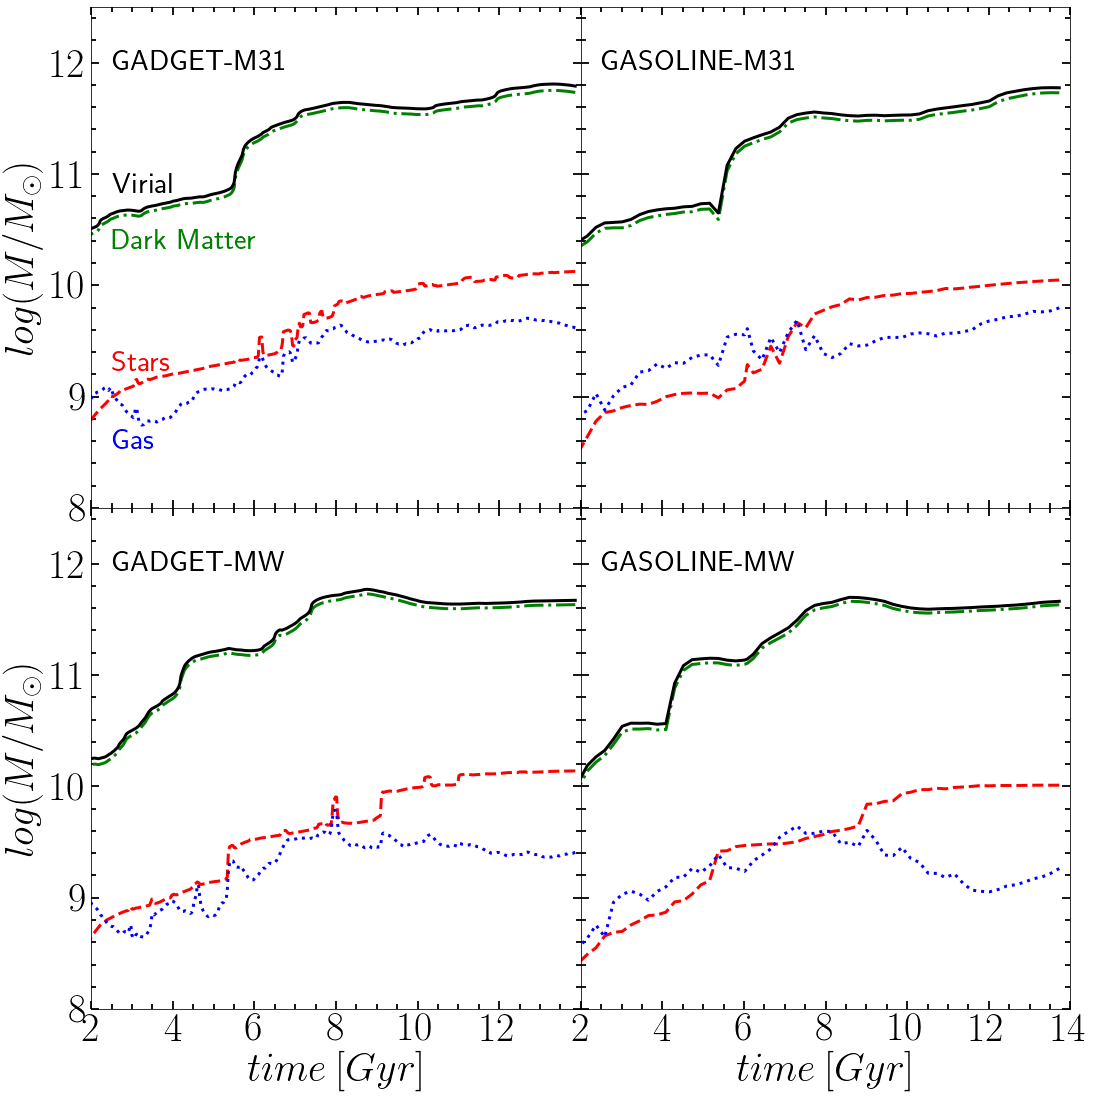

In [7]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# fig=plt.figure(1,figsize=(16,16))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16),sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)



# ax1=fig.add_subplot(221)

ax[0,0].plot(time_M31gd ,Mgal_M31gd,'--', lw=3, color='r')
ax[0,0].plot(time_M31gd ,Mgas_M31gd,':', lw=3, color='b')
ax[0,0].plot(time_M31gd ,Mdrk_M31gd,'-.', lw=3, color='g')
ax[0,0].plot(time_M31gd ,Mvir_M31gd,'-', lw=3, color='k')
ax[0,0].set_ylabel(r'$log(M/M_{\odot})$', fontsize=40)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
ax[0,0].set_yticks([8,9,10,11,12])
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(8,12.5)
ax[0,0].set_xlim(2,14)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[0,0].text(2.5, 12, 'GADGET-M31', fontsize=30, color='k', ha='left', va='center')
ax[0,0].text(2.5, 10.9, 'Virial', fontsize=30, color='k', ha='left', va='center')
ax[0,0].text(2.5, 10.4, 'Dark Matter', fontsize=30, color='g', ha='left', va='center')
ax[0,0].text(2.5, 9.3, 'Stars', fontsize=30, color='r', ha='left', va='center')
ax[0,0].text(2.5, 8.6, 'Gas', fontsize=30, color='b', ha='left', va='center')

#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(time_M31gs ,Mgal_M31gs,'--', lw=3, color='r')
ax[0,1].plot(time_M31gs ,Mgas_M31gs,':', lw=3, color='b')
ax[0,1].plot(time_M31gs ,Mdrk_M31gs,'-.', lw=3, color='g')
ax[0,1].plot(time_M31gs ,Mvir_M31gs,'-', lw=3, color='k')
ax[0,1].set_xticks([2,4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
# ax[0,1].set_yticklabels([])
# ax[0,0].set_ylim(0,0.5)
ax[0,1].set_xlim(2,14)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[0,1].text(2.5, 12, 'GASOLINE-M31', fontsize=30, color='k', ha='left', va='center')

# #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(time_MWgd ,Mgal_MWgd,'--', lw=3, color='r')
ax[1,0].plot(time_MWgd ,Mgas_MWgd,':', lw=3, color='b')
ax[1,0].plot(time_MWgd ,Mdrk_MWgd,'-.', lw=3, color='g')
ax[1,0].plot(time_MWgd ,Mvir_MWgd,'-', lw=3, color='k')
ax[1,0].set_xticks([2,4,6,8,10,12])
ax[1,0].set_ylabel(r'$log(M/M_{\odot})$', fontsize=40)
ax[1,0].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,0].set_xlim(2,14)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,0].text(2.5, 12, 'GADGET-MW', fontsize=30, color='k', ha='left', va='center')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
ax[1,1].plot(time_MWgs ,Mgal_MWgs,'--', lw=3, color='r')
ax[1,1].plot(time_MWgs ,Mgas_MWgs,':', lw=3, color='b')
ax[1,1].plot(time_MWgs ,Mdrk_MWgs,'-.', lw=3, color='g')
ax[1,1].plot(time_MWgs ,Mvir_MWgs,'-', lw=3, color='k')
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,1].set_xlim(2,14)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,1].text(2.5, 12, 'GASOLINE-MW', fontsize=30, color='k', ha='left', va='center')

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/Mass_time.png', dpi = 100, xxbox_inches='tight')

plt.show()

## Mgal vs Mvir

In [8]:
masa_obs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/sem2/masas_obs.dat')
masa_vir = masa_obs[:,0]
vir_err  = masa_obs[:,1]
masa_gal = masa_obs[:,2]
gal_err  = masa_obs[:,3]

vir_err_high = log10(1+vir_err/masa_vir)
vir_err_low  = log10(masa_vir/(masa_vir-vir_err))
gal_err_high = log10(1+gal_err/masa_gal)
gal_err_low  = log10(masa_gal/(masa_gal-gal_err))

masa_vir = log10(masa_vir)
masa_gal = log10(masa_gal)
  
c = 0.129
M0 = 10**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440
MM = arange (10,13,0.05)
M_vir = 10**MM

#------------------curva de Guo et al 2010-------------------
c1 = (M_vir/M0)**(-alpha)
c2 = (M_vir/M0)**beta
M_estrella = M_vir * c * ((c1+c2)**(-gamma))

Me=log10(M_estrella)

#-------fraccion de bariones universal--------------------
MM1 = arange (10, 12.5, 0.05)
fbar = 0.0418/0.24
Mbar = fbar * 10**MM1

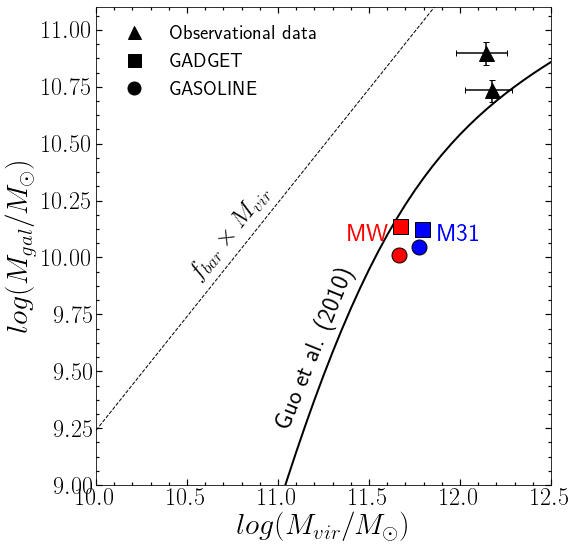

In [15]:
from __future__ import unicode_literals
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib.legend_handler import HandlerLine2D

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(MM,Me,'k', lw=2)
ax.plot(MM1,log10(Mbar),'--', lw=1, color ='k')
ax.plot(Mvir_M31gd[0], Mgal_M31gd[0],'s', markersize=15, color='b', label = 'GadgetM31', mec='k' )
ax.plot(Mvir_MWgd[0],  Mgal_MWgd[0] ,'s', markersize=15, color='r', label = 'GadgetMW', mec='k' )
ax.plot(Mvir_M31gs[0], Mgal_M31gs[0],'o', markersize=15, color='b', label = 'GasolineM31', mec='k' )
ax.plot(Mvir_MWgs[0],  Mgal_MWgs[0] ,'o', markersize=15, color='r', label = 'GasolimeMW', mec='k' )
ax.errorbar(masa_vir[:2],masa_gal[:2],xerr=[vir_err_low[:2],vir_err_high[:2]] ,
            yerr=[gal_err_low[:2],gal_err_high[:2]], color='k', fmt='^', markersize=15, capsize=3)
ax.set_ylim(9,11.1)
ax.set_xlim(10,12.5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax.set_xlabel(r'$log(M_{vir}/M_{\odot})$', fontsize=30)
ax.set_ylabel(r'$log(M_{gal}/M_{\odot})$', fontsize=30)
ax.text(x = 11.2, y = 9.6, s = u'Guo et al. (2010)', fontsize = 25, rotation= 68,  style='italic',
         verticalalignment = 'center', horizontalalignment = 'center')
ax.text(x = 10.75, y = 10.1, s = r'$f_{bar}\times M_{vir}$', fontsize = 25, rotation= 51,
         verticalalignment = 'center', horizontalalignment = 'center')
ax.text(12,10.1, 'M31', fontsize=25, color='blue', ha='center', va='center')
ax.text(11.50,10.1, 'MW', fontsize=25, color='red', ha='center', va='center')
        
handles, labels = ax.get_legend_handles_labels()

#Create custom artists

Gadget = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='',markersize=13)
Gasoline = plt.Line2D((0,1),(0,0), color='k', marker ='o', linestyle='',markersize=13)
Observacional = plt.Line2D((0,1),(0,0), color='k', marker ='^', linestyle='',markersize=13)

#Create legend from custom artist/label lists

ax.legend([Observacional, Gadget,Gasoline],['Observational data ','GADGET', 'GASOLINE'],
           fontsize=20, frameon=False, loc=2, numpoints=1 )

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/Mgal_Mvir.png', dpi = 100)

plt.show()